#A simple RNN for fashion MNIST Classification
### Dr. Leticia C. Cagnina
### Mexican NLP Summer School 2021 (June 3rd, 2021)
### https://ampln.github.io/escuelaverano2021/


---


# About this notebook
The content of this notebook is based on the work published at https://github.com/codingyogini/TensorFlow-NNs/blob/master/NN_MNIST_depth.ipynb.
Modifications were performed in order to adapt it to the requirements of **“Redes Neuronales: conceptos básicos y aplicaciones”** Turorial at
**Mexican NLP Summer School 2021**. For doubts/suggestions, please contact me: lcagnina@gmail.com. I recommend run the notebook in Google Colab, setting the runtime type to GPU to accelerate the execution. 

# Content:

Exploring Neural Networks with fashion MNIST.

    * Introducing the Fashion MNIST dataset
    * Comparing different neural network by depth: 3, 6 and 12 layers (NN-3 vs NN-6 vs NN-12)
    * Improving predictions with more epochs (5 vs 30)
    * Visualizing predictions
    
This notebook shows a simple MultiLayer Preceptron neural network to classify fashion MNIST images. Different models will be tested in order to observe the performance of the classifier with different number of layers. Note that particular activation functions are used such as Softmax and ReLu. These are typical in the classification of categorical data.

This is an introductory practice to the topic!!! will study more interesting problems in next notebooks: Deep Learning and LSTM!! 

In [1]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt 
import math

print (tf.__version__) # 2.4.1

2.5.0


## The fashion MNIST dataset

Zalando research published this dataset, with 10 different fashion products. Called fashion MNIST, this dataset is meant to be a replacement for the original MNIST which turned out to be too easy for machine learning folks; even linear classifiers were able to achieve high classification accuracy. This new dataset promises to be more challenging, so that machine learning algorithms have to learn more advanced features to correctly classify the images.
The fashion MNIST dataset contains 70,000 greyscale images distributed in 10 categories. The images show individual articles of clothing at low resolution (28x28px). Below we can see a sample of 25 images with their labels.

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

### Loading the fashion MNIST data 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Exploring and Visualizing the data
The data can be loaded from Keras into a Training set (60,000 images) and Testing set (10,000 images). The images are 28x28 arrays with pixel values 0 to 255, and the labels are an array of integers 0 to 9, representing 10 classes of clothing. We can see the training data was stored in an array of shape (60000,28,28) and testing data in an array of shape (10000,28,28).

In [3]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


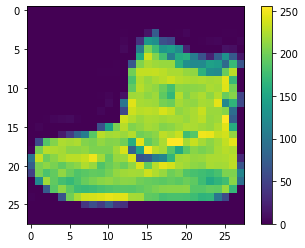

In [4]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

### Normalizing the data 
The next step is to normalize the data dimensions so that they are approximately the same scale.

In [5]:
# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

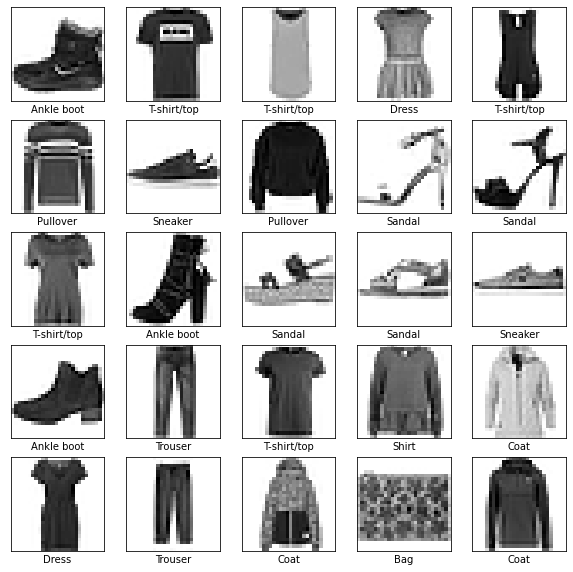

In [6]:
# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])
	

### The first NN model 

Step 1 - Build the architecture

Step 2 - Compile the model 

Step 3 - Train the model

Step 4 - Evaluate the model 

#### Step1: The arquitecture
First, we’ll design the NN architecture by deciding the number of layers and activation functions. We’ll start with a simple 3-layer Neural Network. In the first layer we ‘flatten’ the data, so that a (28x28) shape flattens to 784. The second layer is a dense layer with a ReLu activation function and has 128 neurons. The last layer is a dense layer with a softmax activation function that classifies the 10 categories of the data and has 10 neurons.

* Flatten layer: only flattens the input.

* Dense layer: regular densely-connected NN layer. Dense implements the operation: output = activation(dot(input, weight) + bias)

* ReLu activation function: computes rectified linear: max(input, 0). It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance. Overcomes the vanishing gradient problem (the model stops learning), allowing models to learn faster and perform better. It is the default activation when developing multilayer Perceptron and convolutional neural networks. Because the rectified function is linear for half of the input domain and nonlinear for the other half, it is referred to as a piecewise linear function. Mathematically, it is written as $f(x) = max(0,x)$ and it looks like:

<p align="center">
  <img src="https://www.nbshare.io/static/images/c86731af-fd43-46f0-920b-f5afa2e51479.png">
</p>

* Softmax activation function: converts a real vector (the output) to a vector of categorical probabilities. The elements of the output vector are in range (0, 1) and sum to 1. Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution. The softmax of each vector $\textbf{x}$ is computed as $f(\textbf{x})=\frac{\exp(x_i)}{\sum_j \exp(x_j)}$ for each element $i,j$ of $\textbf{x}$. Many multi-layer neural networks end in a penultimate layer which outputs real-valued scores that are not conveniently scaled and which may be difficult to work with. Here the softmax is very useful because it converts the scores to a normalized probability distribution, which can be displayed to the user. For this reason it is usual to append a softmax function as the final layer of the neural network. For a 2-dim vector, softmax looks like (https://themaverickmeerkat.com/2019-10-23-Softmax/):

<p align="center">
  <img width="460" height="300" src="https://themaverickmeerkat.com/img/softmax/softmax_2d.png">




* The model summary table provides a nice visualization of the network architecture and parameters.

In [7]:
# Step 1 - Build the architecture
# Model: a simple 3-layer neural network
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary() 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Step 2: the model

`compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`: configures the model for the training, using `optimizer` with the objective function `loss` and the results will be reported in base to `metrics`. 

Loss function — calculates the difference between the output and the target variable. It measures the accuracy of the model during training and we want to minimize this function. 

Optimizer — how the model is updated and is based on the data and the loss function. 

Metrics — monitors the training and testing steps. Accuracy is a common metric and it measures the fraction of images that are correctly classified.

* Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters". Also is effective.

* `sparse_categorical_crossentropy` computes the crossentropy loss between the labels and predictions. This crossentropy loss function is used when there are two or more label classes. It expects labels as integers (no one-hot representation). 

In [8]:
# Step 2 - Compile the model
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#### Step 3: Training

We train the model by fitting it to the training data, so we give it the input (images) and expected output (labels). Here, an important step to minimize overfitting is validation. There are a few ways to validate, in this case, we use the automatic validation built into the function, where we set the validation_split on the training data. Here we use an 80/20 split: 80% for training and 20% for validating. We also need to define how many times the network will be trained, this is an `epoch`. It’s an *arbitrary* cutoff and here we choose 5 epochs. Take into account:

**Epoch** — one forward pass and one backward pass of *all* the training examples

**Iteration** — number of passes, (forward and backward) to complete one epoch

Example: if you have 1,000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

Training will show you the following results per epoch, note that with each epoch, the loss decreases and the accuracy increases, meaning our model is improving.


In [9]:
#Step 3 - Train the model, by fitting it to the training data
# 5 epochs, and split the training set into 80/20 for validation
# batch size = default=32
#steps_per_epoch: by default is num_samples_train/batch_size then 1500 in this case (48000/32) --> 1500 times pass 32 inputs to complete 1 epoch (48000 inputs)

model_3.fit(train_images, train_labels, epochs=5, validation_split=0.2,shuffle=True)


Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5263 - accuracy: 0.8172 - val_loss: 0.4217 - val_accuracy: 0.8478
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3921 - accuracy: 0.8592 - val_loss: 0.4086 - val_accuracy: 0.8545
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3541 - accuracy: 0.8719 - val_loss: 0.3676 - val_accuracy: 0.8661
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3233 - accuracy: 0.8821 - val_loss: 0.3548 - val_accuracy: 0.8729
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3067 - accuracy: 0.8870 - val_loss: 0.3316 - val_accuracy: 0.8771


#### Step 4: the evaluation of the model on Test set

Now that we’ve set up and trained our model, we need to evaluate its performance. This is done on a test dataset, new data that the model hasn’t seen yet. We have to make sure to separate our training and validating dataset from our testing dataset.



In [10]:
#Step 4 - Evaluate the model
test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss: {:.2f}%".format(test_loss * 100))
print("Model - 3 layers - test accuracy: {:.2f}%".format(test_acc * 100)) 

313/313 [==============================] - 1s 2ms/step - loss: 0.3564 - accuracy: 0.8718
Model - 3 layers - test loss: 35.64%
Model - 3 layers - test accuracy: 87.18%


### Making predictions with the NN-3 model trained for 5 epochs

In [11]:
# confidence of the model that the image corresponds to the label 
predictions = model_3.predict(test_images)
predictions.shape #(10000, 10)
predictions[0]

array([1.0890001e-06, 6.6310065e-08, 7.7678880e-07, 2.5755060e-07,
       7.8005519e-07, 8.9554591e-03, 1.4515350e-05, 1.4738313e-02,
       6.0111470e-05, 9.7622854e-01], dtype=float32)

In [12]:
np.argmax(predictions[0])

9

In [13]:
class_names[9]

'Ankle boot'

In [14]:
#Ankle boot has the highest confidence value 
test_labels[0]


9

In [15]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

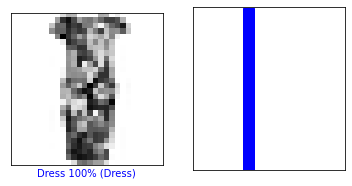

In [16]:
# look at 100th image, predictions, prediction array
i=100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

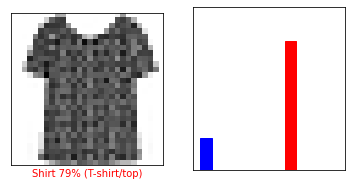

In [17]:
i = 1000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

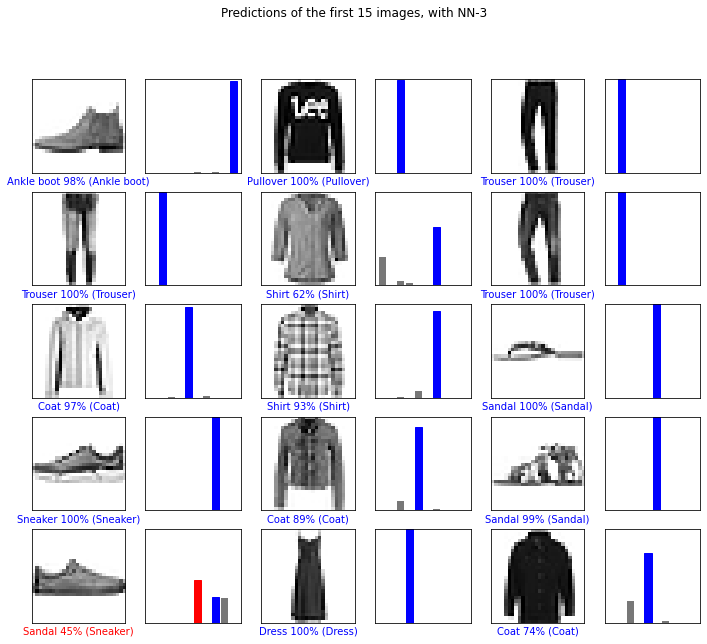

In [18]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.suptitle("Predictions of the first 15 images, with NN-3")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


### Is deeper more accurate? 

Comparing network depth, with a NN-6 and NN-12

In [19]:
# Model a simple 6-layer neural network 
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#model_6.summary() 
model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
#Train the NN-6 with 5 epochs 
model_6.fit(train_images, train_labels, epochs=5, validation_split=0.2)

#Evaluate the model with test datasets
test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print("Model - 6 layers - test loss: {:.2f}%".format(test_loss * 100))
print("Model - 6 layers - test accuracy: {:.2f}%".format(test_acc * 100)) 

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5147 - accuracy: 0.8148 - val_loss: 0.4240 - val_accuracy: 0.8440
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3813 - accuracy: 0.8601 - val_loss: 0.3668 - val_accuracy: 0.8667
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3456 - accuracy: 0.8726 - val_loss: 0.3553 - val_accuracy: 0.8721
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3236 - accuracy: 0.8783 - val_loss: 0.3710 - val_accuracy: 0.8652
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3858 - accuracy: 0.8595
Model - 6 layers - test loss: 38.58%
Model - 6 layers - test accuracy: 85.95%


In [21]:
# Model a simple 12-layer neural network 
model_12 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#model_12.summary() 
model_12.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
#Train the NN-12 with 5 epochs 
model_12.fit(train_images, train_labels, epochs=5, validation_split=0.2)

#Evaluate the model
test_loss, test_acc = model_12.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss: {:.2f}%".format(test_loss * 100))
print("Model - 12 layers - test accuracy: {:.2f}%".format(test_acc * 100)) 

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5969 - accuracy: 0.7819 - val_loss: 0.4317 - val_accuracy: 0.8448
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4307 - accuracy: 0.8470 - val_loss: 0.4288 - val_accuracy: 0.8585
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3875 - accuracy: 0.8616 - val_loss: 0.4356 - val_accuracy: 0.8363
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3705 - accuracy: 0.8702 - val_loss: 0.3686 - val_accuracy: 0.8729
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3918 - accuracy: 0.8661
Model - 12 layers - test loss: 39.18%
Model - 12 layers - test accuracy: 86.61%


### Does increasing epochs improve our classification?




#### Re-train the NN-3 with 30 epochs, and plot the loss and accuracy

In [23]:
# NN-3, 30 epochs 
history_NN3_30=model_3.fit(train_images, train_labels, epochs=30, validation_split=0.2)

test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print("Model 30 - 3 layers - test loss: {:.2f}%".format(test_loss * 100))
print("Model 30 - 3 layers - test accuracy: {:.2f}%".format(test_acc * 100)) 

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2876 - accuracy: 0.8922 - val_loss: 0.3429 - val_accuracy: 0.8765
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2740 - accuracy: 0.8985 - val_loss: 0.3409 - val_accuracy: 0.8769
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2609 - accuracy: 0.9034 - val_loss: 0.3245 - val_accuracy: 0.8869
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2530 - accuracy: 0.9062 - val_loss: 0.3508 - val_accuracy: 0.8740
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2434 - accuracy: 0.9088 - val_loss: 0.3189 - val_accuracy: 0.8867
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2366 - accuracy: 0.9112 - val_loss: 0.3370 - val_accuracy: 0.8840
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2289 - accuracy: 0.9153 - val_loss: 0.3167 - val_accuracy:

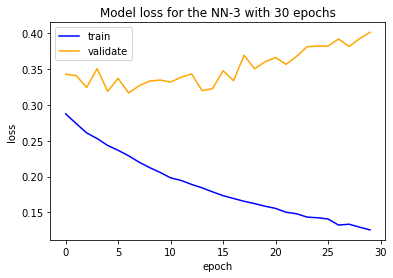

In [24]:
#Plot loss results for training data and testing data 
plt.plot(history_NN3_30.history['loss'], 'blue')
plt.plot(history_NN3_30.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3 with 30 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


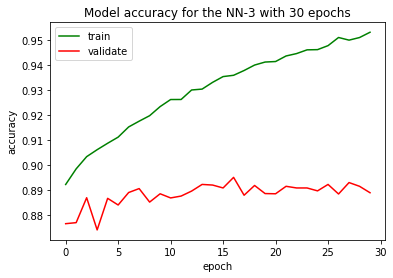

In [25]:
#Plot accuracy results for training data and testing data 
plt.plot(history_NN3_30.history['accuracy'], 'green')
plt.plot(history_NN3_30.history['val_accuracy'], 'red')
plt.title('Model accuracy for the NN-3 with 30 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

#### Re-train the NN-6 with 30 epochs, and plot the loss and accuracy

In [26]:
# NN-6, 30 epochs
history_NN6_30=model_6.fit(train_images, train_labels, epochs=30, validation_split=0.2)

test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print("Model 30 - 6 layers - test loss: {:.2f}%".format(test_loss * 100))
print("Model 30 - 6 layers - test accuracy: {:.2f}%".format(test_acc * 100)) 


Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2895 - accuracy: 0.8910 - val_loss: 0.3462 - val_accuracy: 0.8760
Epoch 2/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2771 - accuracy: 0.8965 - val_loss: 0.3394 - val_accuracy: 0.8800
Epoch 3/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2650 - accuracy: 0.9011 - val_loss: 0.3453 - val_accuracy: 0.8771
Epoch 4/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2567 - accuracy: 0.9039 - val_loss: 0.3409 - val_accuracy: 0.8786
Epoch 5/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2462 - accuracy: 0.9072 - val_loss: 0.3320 - val_accuracy: 0.8878
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2408 - accuracy: 0.9091 - val_loss: 0.3176 - val_accuracy: 0.8854
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2310 - accuracy: 0.9137 - val_loss: 0.3404 - val_accuracy:

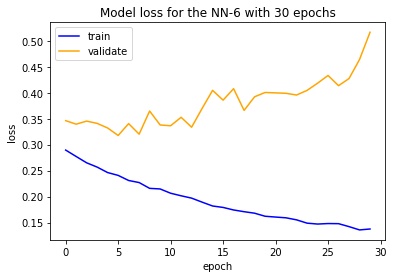

In [27]:
#Plot loss results for training data and testing data
plt.plot(history_NN6_30.history['loss'], 'blue')
plt.plot(history_NN6_30.history['val_loss'], 'orange')
plt.title('Model loss for the NN-6 with 30 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


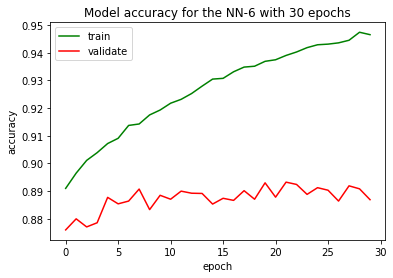

In [28]:
#Plot accuracy results for training data and testing data 
plt.plot(history_NN6_30.history['accuracy'], 'green')
plt.plot(history_NN6_30.history['val_accuracy'],'red')
plt.title('Model accuracy for the NN-6 with 30 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

#### Re-train the NN-12 with 30 epochs, and plot the loss and accuracy

In [29]:
# NN-12, 30 epochs 
history_NN12_30=model_12.fit(train_images, train_labels, epochs=30, validation_split=0.2)

test_loss, test_acc = model_12.evaluate(test_images, test_labels)
print("Model 30 - 12 layers - test loss: {:.2f}%".format(test_loss * 100))
print("Model 30 - 12 layers - test accuracy: {:.2f}%".format(test_acc * 100)) 


Epoch 1/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3333 - accuracy: 0.8819 - val_loss: 0.3603 - val_accuracy: 0.8722
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3252 - accuracy: 0.8843 - val_loss: 0.3639 - val_accuracy: 0.8731
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3084 - accuracy: 0.8888 - val_loss: 0.3421 - val_accuracy: 0.8785
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3023 - accuracy: 0.8900 - val_loss: 0.3654 - val_accuracy: 0.8754
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2915 - accuracy: 0.8951 - val_loss: 0.3574 - val_accuracy: 0.8794
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2838 - accuracy: 0.8988 - val_loss: 0.3436 - val_accuracy: 0.8854
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2764 - accuracy: 0.9006 - val_loss: 0.3470 - val_accuracy:

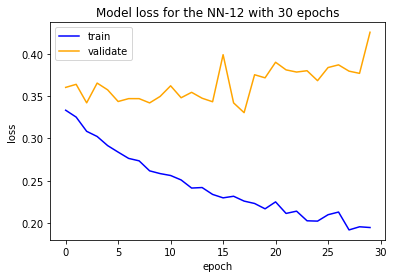

In [30]:
#Plot loss results for training data and testing data
plt.plot(history_NN12_30.history['loss'], 'blue')
plt.plot(history_NN12_30.history['val_loss'], 'orange')
plt.title('Model loss for the NN-12 with 30 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


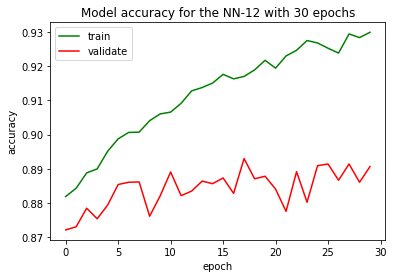

In [31]:
#Plot accuracy results for training data and testing data 
plt.plot(history_NN12_30.history['accuracy'], 'green')
plt.plot(history_NN12_30.history['val_accuracy'], 'red')
plt.title('Model accuracy for the NN-12 with 30 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

### Making predictions with the NN-3 model trained for 30 epochs

In [32]:
# confidence of the model that the image corresponds to the label 
predictions = model_3.predict(test_images)
predictions.shape #(10000, 10)
predictions[0]

array([3.9196123e-13, 1.0986662e-12, 1.2269792e-12, 3.0964011e-17,
       2.4425145e-12, 8.5408763e-05, 2.5616087e-12, 1.2422174e-04,
       3.7542503e-13, 9.9979037e-01], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
class_names[9]

'Ankle boot'

In [35]:
#Ankle boot has the highest confidence value 
test_labels[0]


9

In [36]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

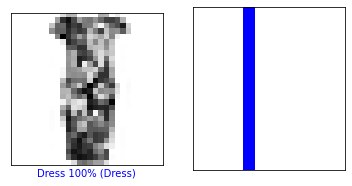

In [37]:
# look at 100th image, predictions, prediction array
i=100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

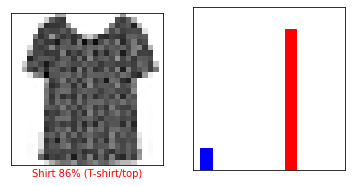

In [38]:
i = 1000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

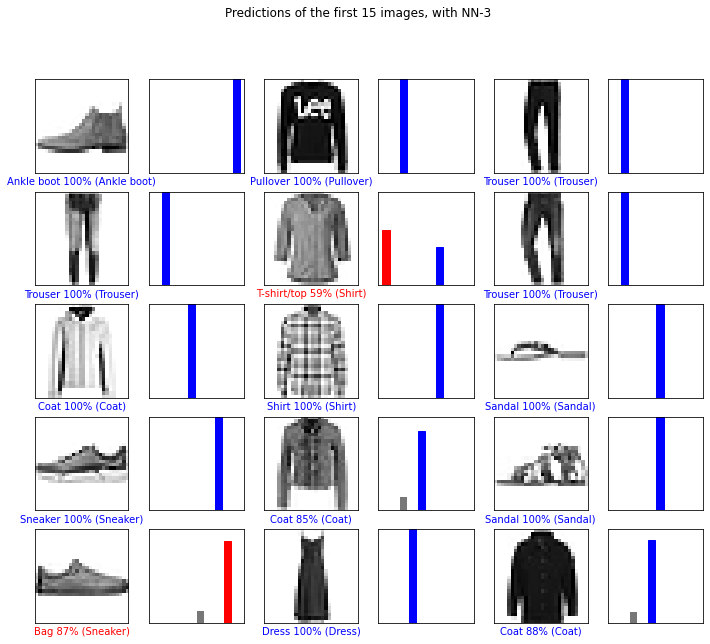

In [39]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.suptitle("Predictions of the first 15 images, with NN-3")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


### Making predictions with the NN-12

In [40]:
predictions = model_12.predict(test_images)

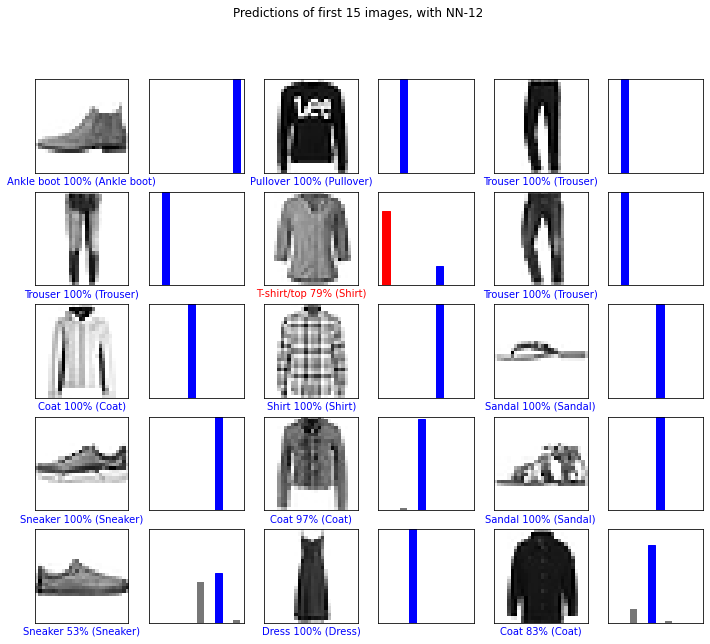

In [41]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.suptitle("Predictions of first 15 images, with NN-12")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
    